In [1]:
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from sklearn.datasets import load_iris, fetch_california_housing
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import pandas as pd
import numpy as np

In [2]:
dataset = fetch_california_housing()
X = dataset.data
y = dataset.target # For housing, we might cluster the data itself, not based on a target
feature_names = dataset.feature_names
dataset_name = "California Housing"
# For clustering on housing, we don't have predefined classes, so y is not used for coloring in t-SNE plot
y = None

In [3]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [4]:
# Apply t-SNE
# You can adjust parameters like n_components, perplexity, n_iter
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X_scaled)

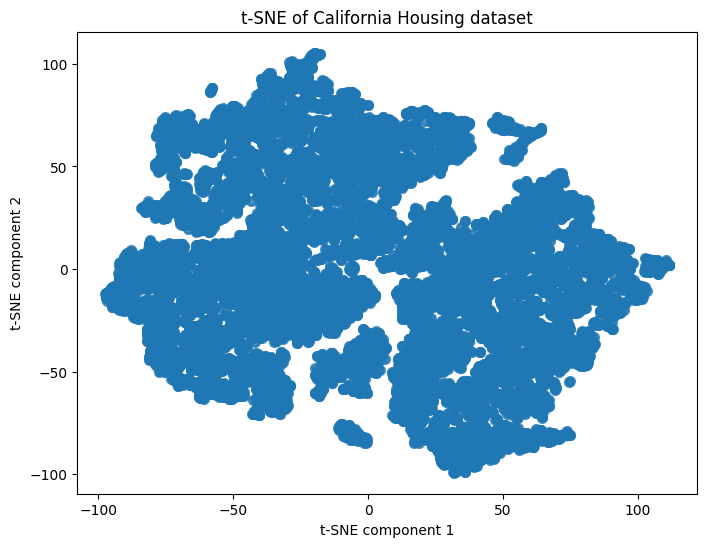

In [5]:
# Create a scatter plot of the t-SNE results
plt.figure(figsize=(8, 6))

plt.scatter(X_tsne[:, 0], X_tsne[:, 1], alpha=.8, lw=2)

plt.title(f't-SNE of {dataset_name} dataset')
plt.xlabel('t-SNE component 1')
plt.ylabel('t-SNE component 2')
plt.show()

In [10]:
X_tsne[0, 0], X_tsne[0, 1]

(np.float32(101.99177), np.float32(-12.54681))

<ipython-input-8-2fb6c1a7c57c>:6: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = plt.cm.get_cmap('viridis', n_clusters_housing)


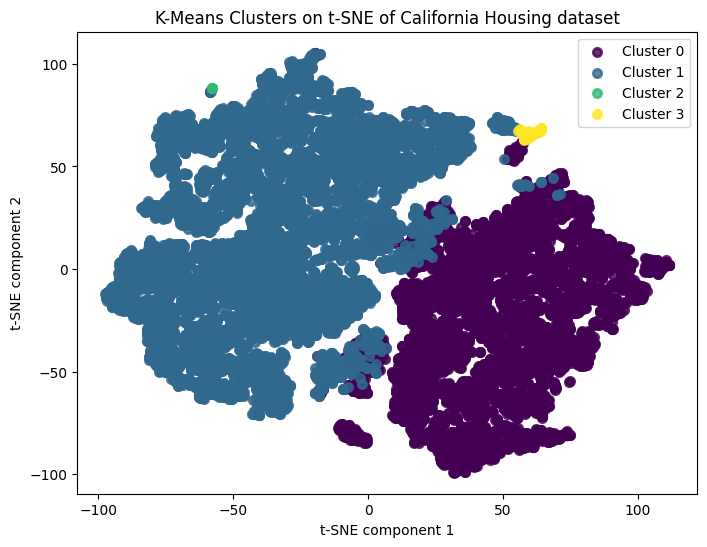

In [8]:
n_clusters_housing = 4
kmeans = KMeans(n_clusters=n_clusters_housing, random_state=42, n_init=10)
clusters = kmeans.fit_predict(X_scaled)
plt.figure(figsize=(8, 6))
# Generate a colormap for clusters
cmap = plt.cm.get_cmap('viridis', n_clusters_housing)
lw = 2
for i in range(n_clusters_housing):
    plt.scatter(X_tsne[clusters == i, 0], X_tsne[clusters == i, 1], color=cmap(i), alpha=.8, lw=lw,
                label=f'Cluster {i}')
plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.title(f'K-Means Clusters on t-SNE of {dataset_name} dataset')
plt.xlabel('t-SNE component 1')
plt.ylabel('t-SNE component 2')
plt.show()